# MOVIE RECOMENDATION :

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns


In [37]:
data = pd.read_csv("movie.zip")

In [22]:
data.head(5)

,Unnamed: 0,index,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,...,averageRating,numVotes,ordering,title,region,language,types,attributes,isOriginalTitle,Description
0,0,0,tt0102926,movie,The Silence of the Lambs,The Silence of the Lambs,0,1991,\N,118,...,8.6,1473918,50,The Silence of the Lambs,US,en,\N,\N,0,"Jodie Foster stars as Clarice Starling, a top ..."
1,1,1,tt0103064,movie,Terminator 2: Judgment Day,Terminator 2: Judgment Day,0,1991,\N,137,...,8.6,1128166,17,Terminator 2: Judgment Day,US,en,dvd,\N,0,"In this sequel set eleven years after ""The Ter..."
2,2,3,tt0110357,movie,The Lion King,The Lion King,0,1994,\N,88,...,8.5,1090882,18,The Lion King 3D,US,en,\N,3-D version,0,This Disney animated feature follows the adven...
3,3,4,tt0110912,movie,Pulp Fiction,Pulp Fiction,0,1994,\N,154,...,8.9,2118762,22,Pulp Fiction,US,en,\N,\N,0,Vincent Vega (John Travolta) and Jules Winnfie...
4,4,5,tt0111161,movie,The Shawshank Redemption,The Shawshank Redemption,0,1994,\N,142,...,9.3,2759621,2,The Shawshank Redemption,US,en,\N,\N,0,Andy Dufresne (Tim Robbins) is sentenced to tw...


In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7850 entries, 0 to 7849
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       7850 non-null   int64  
 1   index            7850 non-null   int64  
 2   tconst           7850 non-null   object 
 3   titleType        7850 non-null   object 
 4   primaryTitle     7850 non-null   object 
 5   originalTitle    7850 non-null   object 
 6   isAdult          7850 non-null   int64  
 7   startYear        7850 non-null   int64  
 8   endYear          7850 non-null   object 
 9   runtimeMinutes   7850 non-null   object 
 10  genres           7850 non-null   object 
 11  averageRating    7850 non-null   float64
 12  numVotes         7850 non-null   int64  
 13  ordering         7850 non-null   int64  
 14  title            7850 non-null   object 
 15  region           7850 non-null   object 
 16  language         7850 non-null   object 
 17  types         

In [24]:
data.describe()

,Unnamed: 0,index,isAdult,startYear,averageRating,numVotes,ordering,isOriginalTitle
count,7850.00000,7850.000000,7850.0,7850.000000,7850.000000,7.850000e+03,7850.000000,7850.0
mean,3924.50000,5286.804076,0.0,2013.204331,7.367605,7.527845e+04,16.440382,0.0
std,2266.24414,2851.482333,0.0,6.987697,0.605137,1.779794e+05,12.871290,0.0
min,0.00000,0.000000,0.0,1990.000000,6.500000,6.000000e+00,1.000000,0.0
25%,1962.25000,2847.250000,0.0,2008.000000,6.900000,6.035000e+03,6.000000,0.0
50%,3924.50000,5284.500000,0.0,2015.000000,7.300000,1.484150e+04,13.000000,0.0
75%,5886.75000,7602.750000,0.0,2019.000000,7.800000,5.660500e+04,24.000000,0.0
max,7849.00000,10274.000000,0.0,2023.000000,9.500000,2.759621e+06,119.000000,0.0


In [25]:
data.isna().sum()

Unnamed: 0           0
index                0
tconst               0
titleType            0
primaryTitle         0
originalTitle        0
isAdult              0
startYear            0
endYear              0
runtimeMinutes       0
genres               0
averageRating        0
numVotes             0
ordering             0
title                0
region               0
language             0
types                0
attributes           0
isOriginalTitle      0
Description        188
dtype: int64

In [41]:
data = data[['tconst', 'primaryTitle', 'genres', 'averageRating', 'numVotes']]


In [42]:
data.describe()

,averageRating,numVotes
count,7850.000000,7.850000e+03
mean,7.367605,7.527845e+04
std,0.605137,1.779794e+05
min,6.500000,6.000000e+00
25%,6.900000,6.035000e+03
50%,7.300000,1.484150e+04
75%,7.800000,5.660500e+04
max,9.500000,2.759621e+06


In [43]:
data = data[data['numVotes'] >= 1000]


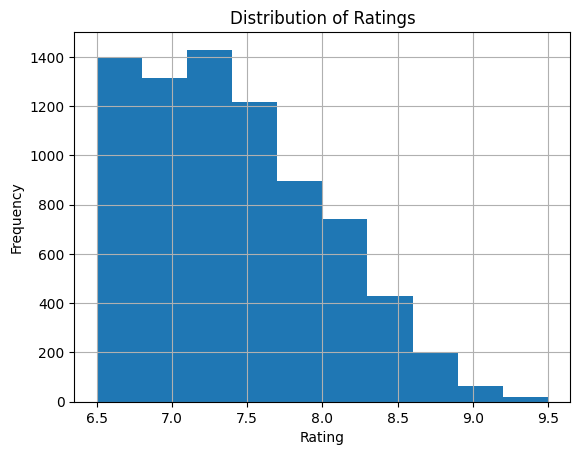

In [44]:
data['averageRating'].hist(bins=10)
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Ratings')
plt.show()


In [60]:
cols_for_heatmap = ['averageRating', 'numVotes']


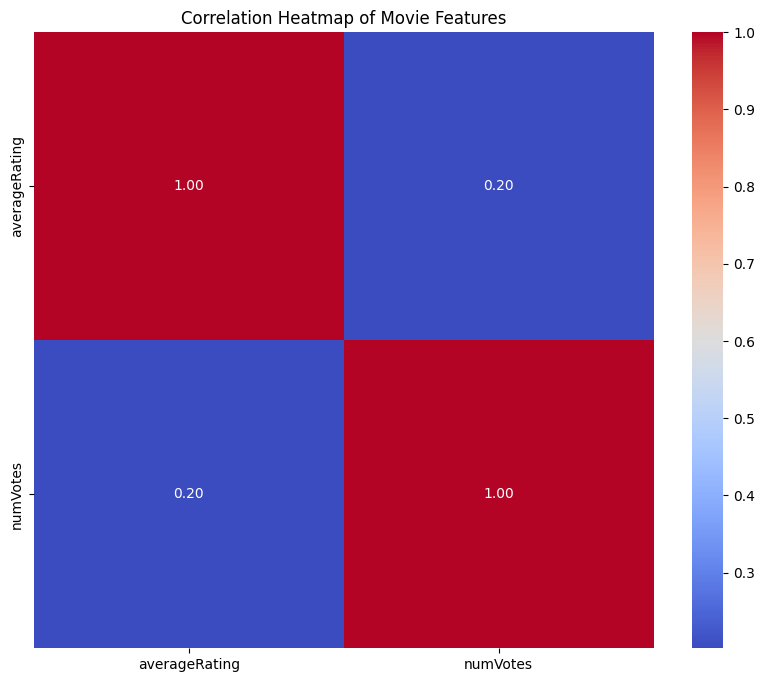

In [61]:
correlation_matrix = data[cols_for_heatmap].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Movie Features')
plt.show()

In [62]:
pearson_corr = data['averageRating'].corr(data['numVotes'])


In [63]:
print("Pearson correlation coefficient between average rating and number of votes:", pearson_corr)


Pearson correlation coefficient between average rating and number of votes: 0.20208779354729367


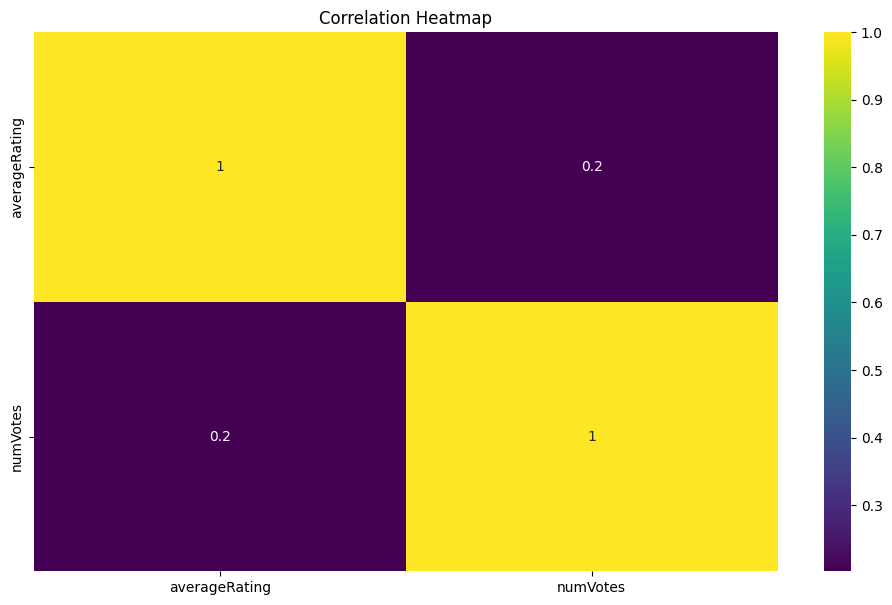

In [65]:
numeric_data = data.select_dtypes(include=['number'])

# Compute the correlation matrix
corr = numeric_data.corr()

# Create a heatmap
plt.figure(figsize=(12, 7))
sns.heatmap(corr, cmap="viridis", annot=True)
plt.title('Correlation Heatmap')
plt.show()

In [47]:
data['genre_combinations'] = data['genres'].apply(lambda x: '|'.join(sorted(x.split(','))))


In [49]:
# Building Recommendation System
# Example: Content-Based Filtering
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel


In [50]:
# TF-IDF Vectorization
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(data['genre_combinations'])


In [51]:
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)


In [52]:
def get_recommendations(title, cosine_sim=cosine_sim):
    idx = data[data['primaryTitle'] == title].index[0]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:11]
    movie_indices = [i[0] for i in sim_scores]
    return data['primaryTitle'].iloc[movie_indices]


In [53]:
get_recommendations('The Shawshank Redemption')


49                                Precious
61                   One Night in Miami...
77                       Treeless Mountain
112                         Mumbai Diaries
180                               The Hunt
208                          The Chaperone
251    The Last Black Man in San Francisco
291                                  Diane
325                              Honey Boy
343                       Charm City Kings
Name: primaryTitle, dtype: object